# 1 Basic inspection

In [42]:
# import all libraries
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [2]:
# Load the data
azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('data/Udacity_CUSTOMERS_052018.csv', sep=';')

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's start by veryfing the shape of our datasets

In [3]:
print("Azdias shape -",azdias.shape)
print("Customers shape -",customers.shape)
extra_cols_in_customers = [col for col in customers.columns if col not in azdias.columns]
print("Extra columns in Customers Data - ",extra_cols_in_customers)

Azdias shape - (891221, 366)
Customers shape - (191652, 369)
Extra columns in Customers Data -  ['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE']


Later, we will want to perform the same PCA transformer and clustering model on both datasets, let's normalize them now by getting rid of the customers extra columns.

In [4]:
del customers['PRODUCT_GROUP']
del customers['CUSTOMER_GROUP']
del customers['ONLINE_PURCHASE']

Let's inspect our datasets

In [5]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [6]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,3.0,5.0,3.0,2.0,6.0,9.0,7.0,3,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,3.0,0.0,9.0,NaN,3,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,4.0,10.0,13.0,11.0,6.0,9.0,2.0,3,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,6.0,4.0,2.0,NaN,9.0,7.0,1,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,3.0,5.0,4.0,2.0,9.0,3.0,1,1,3


So far, we can't say much except that there seems to be a lot of missing values and categorical data.

### Exploring Attribute Information
Additionally we have been given two excel sheets which contain information about the features (for simplicity, they have been manually transformed into csv files). 

In [7]:
attributes_values = pd.read_csv('data/DIAS Attributes - Values 2017.csv', sep=';')
attributes_values["Attribute"] = attributes_values["Attribute"].ffill() # To simply the visualisation

attribute_info = pd.read_csv('data/DIAS Information Levels - Attributes 2017.csv', sep=';', header=1)

attribute_values - contains information about the range of values each column can take and their respective meanings.  
attribute_info - contains detailed information about each column with additional notes wherever required.  
We can use these two dataframes to understand the data, and decide possible transformation.

In [8]:
attributes_values.head(15)

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,NaN,0,no classification possible
2,AGER_TYP,NaN,1,passive elderly
3,AGER_TYP,NaN,2,cultural elderly
4,AGER_TYP,NaN,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,ALTERSKATEGORIE_GROB,NaN,1,< 30 years
7,ALTERSKATEGORIE_GROB,NaN,2,30 - 45 years
8,ALTERSKATEGORIE_GROB,NaN,3,46 - 60 years
9,ALTERSKATEGORIE_GROB,NaN,4,> 60 years


In [9]:
attribute_info.head(15)

,Information level,Attribute,Description,Additional notes
0,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,NaN,ANREDE_KZ,gender,NaN
3,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,NaN,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...
5,NaN,FINANZ_SPARER,financial typology: money saver,NaN
6,NaN,FINANZ_VORSORGER,financial typology: be prepared,NaN
7,NaN,FINANZ_ANLEGER,financial typology: investor,NaN
8,NaN,FINANZ_UNAUFFAELLIGER,financial typology: unremarkable,NaN
9,NaN,FINANZ_HAUSBAUER,financial typology: main focus is the own house,NaN


As we can see, there seem to be a lot of missing values. Additionaly when loading the data, we received the following message:  "DtypeWarning: Columns (18,19) have mixed types". Let's have a look!

In [10]:
print(azdias.columns[18:20])
warning_cols = list(azdias.columns[18:20])


print(azdias[warning_cols[0]].unique())
print(azdias[warning_cols[1]].unique())

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')
[nan 8.0 4.0 2.0 6.0 1.0 9.0 5.0 7.0 3.0 '4' '3' '7' '2' '8' '9' '6' '5'
 '1' 'X']
[nan 51.0 24.0 12.0 43.0 54.0 22.0 14.0 13.0 15.0 33.0 41.0 34.0 55.0 25.0
 23.0 31.0 52.0 35.0 45.0 44.0 32.0 '22' '24' '41' '12' '54' '51' '44'
 '35' '23' '25' '14' '34' '52' '55' '31' '32' '15' '13' '43' '33' '45'
 'XX']


### Addressing specific unknown representations

We have 'X' and 'XX' as values in these columns which have not been given in the description, also there are 'nan' values.  
Unkown values should be properly transformed into 'np.nan' as it will facilitate data cleaning. 

In [11]:
def Xs_to_NaN(df):
    """
    Replace 'X', 'XX' and 'nan' values with np.nan for 'CAMEO_DEUG_2015' and 'CAMEO_INTL_2015' columns
    """
    cols = ["CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    
    df[cols] = df[cols].replace({"X": np.nan, "XX": np.nan})
    df[cols] = df[cols].astype(float) # some numbers were stored as strings 
    
    return df

In [12]:
customers = Xs_to_NaN(customers)
azdias = Xs_to_NaN(azdias)

X and XX are unfortunatly not the only special representation of missing/unknown values. For some columns, unknown data has been assigned a special number (-1, 0…).

In [13]:
unkown_attributes_values = attributes_values[attributes_values["Meaning"] == "unknown"].dropna().reset_index(drop=True)
unkown_attributes_values.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
2,ANREDE_KZ,gender,"-1, 0",unknown
3,BALLRAUM,distance to next urban centre,-1,unknown
4,BIP_FLAG,business-flag indicating companies in the buil...,-1,unknown


The unknown_to_NaN function will go through all attributes of the unknow_attributes dataframe (equivalent of columns names for our datasets), grab the unknown representations, and replace them by np.nan values.

In [14]:
def get_unkown_repr(attrib, unkown_attributes_values):
    """
    Returns the representation of unkown values
    """
    
    unkown = unkown_attributes_values[unkown_attributes_values["Attribute"] == attrib]["Value"]
    unkown = unkown.astype(str).str.cat(sep=",")
    unkown = [int(x) for x in unkown.split(",")]
      
    return [unkown]


def replace_unkown_with_nan(val, unkown):
    """
    Replaces unkown values with np.nan values if the value mathes with the unkown rep
    """
    if val in unkown:
        return np.nan
    else:
        return val

def unknown_to_NaN(df, unkown_attributes_values):
    """
    Replaces unkown values to 'np.nan' in all the columns provided in unkown_attributes_values list.
    """
    for attrib in unkown_attributes_values.Attribute:
        unkown = get_unkown_repr(attrib, unkown_attributes_values)
        if attrib in df.columns:   # For some reasons, some attributes are not present in the datasets
            df[attrib] = df[attrib].apply(replace_unkown_with_nan, args=(unkown))
    return df

In [15]:
# Apply the unknown_to_NaN function to both dataset
customers = unknown_to_NaN(customers, unkown_attributes_values)
azdias = unknown_to_NaN(azdias, unkown_attributes_values)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,3.0,5.0,3.0,2.0,6.0,9.0,7.0,3,1,4
1,9628,NaN,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,3.0,NaN,9.0,NaN,3,1,4
2,143872,NaN,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,4.0,10.0,13.0,11.0,6.0,9.0,2.0,3,2,4
3,143873,1.0,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,6.0,4.0,2.0,NaN,9.0,7.0,1,1,4
4,143874,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,3.0,5.0,4.0,2.0,9.0,3.0,1,1,3


In a similar way, the WOHNLAGE column contains the value "0" for "no score calculated".

In [43]:
def noscore_to_NaN(df):
    """
    Replaces 0 values to 'np.nan' in "WOHNLAGE" 
    """
    df["WOHNLAGE"] = df["WOHNLAGE"].replace({0: np.nan})
    
    return df

In [44]:
customers = noscore_to_NaN(customers)
azdias = noscore_to_NaN(azdias)

In [45]:
customers.head()

,LNR,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,...,3.0,5.0,3.0,2.0,6.0,9.0,7.0,3,0,4
1,143872,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4.0,10.0,13.0,11.0,6.0,9.0,2.0,3,1,4
2,143873,1.0,8.0,8.0,0.0,NaN,0.0,0.0,1.0,0.0,...,2.0,6.0,4.0,2.0,NaN,9.0,7.0,1,0,4
3,143874,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,0.0,...,4.0,3.0,5.0,4.0,2.0,9.0,3.0,1,0,3
4,143888,1.0,11.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,...,4.0,1.0,2.0,1.0,6.0,9.0,1.0,2,0,3


### Cleaning NaN values
Before droping rows with unkown values, let's have a look if we can delete columns with high missings values. 
This will ensure we won't get rid of the majority of the dataset just because a few columns.

In [16]:
# Count and share of missing values
azdias_null = azdias.isnull().sum()
azdias_null_share = azdias_null/len(azdias) * 100

Text(0, 0.5, 'Share of missing values %')

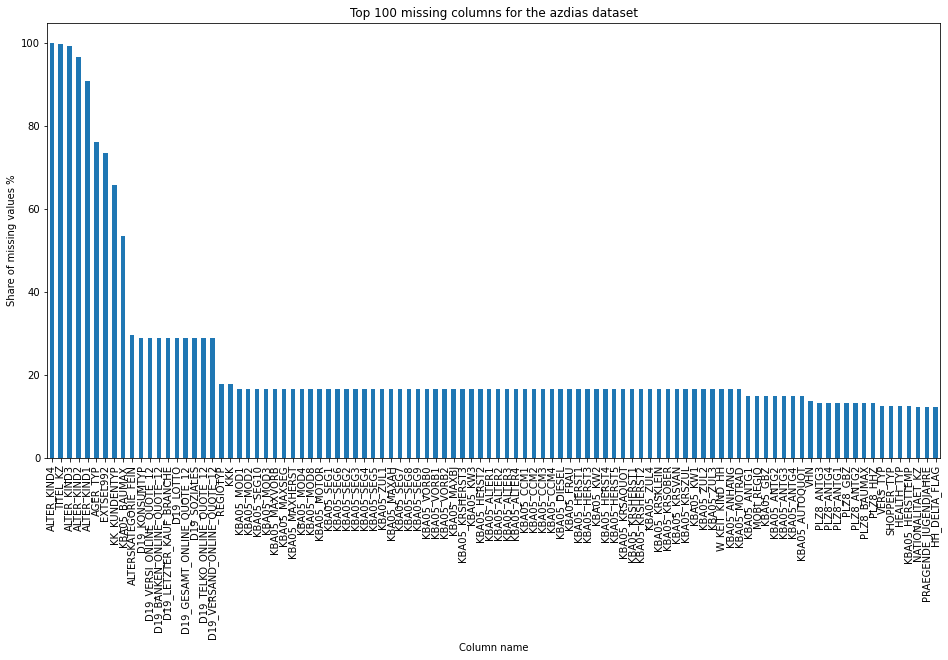

In [17]:
# Plot 100 columns with highest share of missing values
ax = azdias_null_share.sort_values(ascending=False).head(100).plot(kind='bar', figsize=(16,8), title='Top 100 missing columns for the azdias dataset')
ax.set_xlabel("Column name")
ax.set_ylabel("Share of missing values %")

In [18]:
# Count and share of missing values
customers_null = customers.isnull().sum()
customers_null_share = customers_null/len(customers) * 100

Text(0, 0.5, 'Share of missing values %')

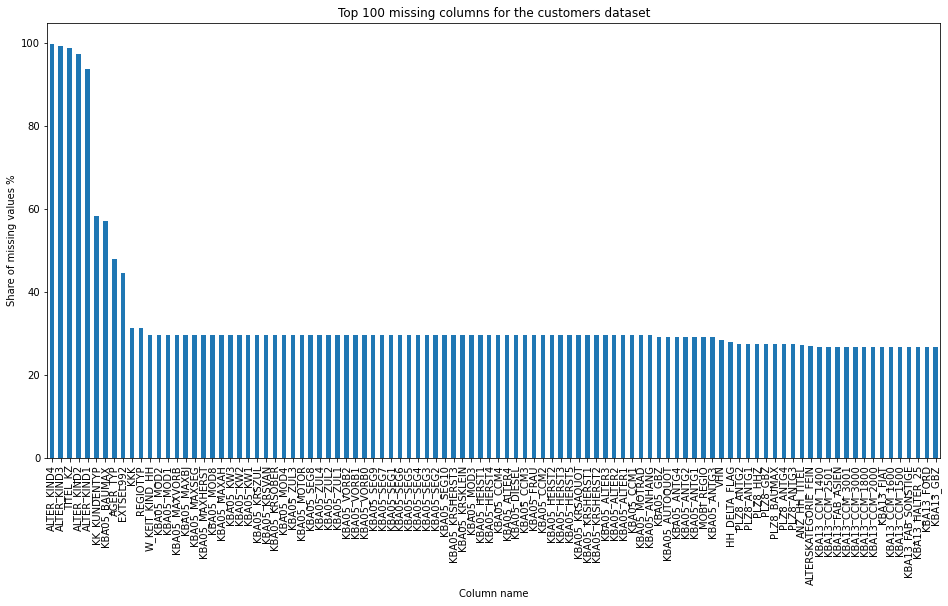

In [19]:
# Plot 100 columns with highest share of missing values
ax = customers_null_share.sort_values(ascending=False).head(100).plot(kind='bar', figsize=(16,8), title='Top 100 missing columns for the customers dataset')
ax.set_xlabel("Column name")
ax.set_ylabel("Share of missing values %")

For both datasets, let's remove all columns with more than 32% missing data.

In [20]:
columns_to_delete_azdias = azdias_null_share[azdias_null_share > 32].sort_values(ascending=False)
columns_to_delete_azdias

ALTER_KIND4     99.864792
TITEL_KZ        99.757636
ALTER_KIND3     99.307691
ALTER_KIND2     96.690047
ALTER_KIND1     90.904837
AGER_TYP        76.019640
EXTSEL992       73.399639
KK_KUNDENTYP    65.596749
KBA05_BAUMAX    53.468668
dtype: float64

In [21]:
columns_to_delete_customers = customers_null_share[customers_null_share > 32].sort_values(ascending=False)
columns_to_delete_customers

ALTER_KIND4     99.876860
ALTER_KIND3     99.334732
TITEL_KZ        98.793647
ALTER_KIND2     97.338927
ALTER_KIND1     93.860748
KK_KUNDENTYP    58.406382
KBA05_BAUMAX    57.153069
AGER_TYP        48.059504
EXTSEL992       44.498883
dtype: float64

In [22]:
common_columns_to_delete = (set(columns_to_delete_azdias.index) & set(columns_to_delete_customers.index))

print("Number of common columns to delete: {}, length of columns to delete for azdias: {}, for customers: {}".format(len(common_columns_to_delete), len(columns_to_delete_azdias), len(columns_to_delete_customers)))

Number of common columns to delete: 9, length of columns to delete for azdias: 9, for customers: 9


By deleting all columns with more than 32% missing data, we would get rid of the same columns in both datasets. It is a good thing, as we want to our dataset to have the exact same features. 

In [23]:
for column in columns_to_delete_azdias.index:
    del azdias[column]
    del customers[column]

In [24]:
#Quick sanity check
print(azdias.shape)
print(customers.shape)

(891221, 357)
(191652, 357)


So far so good!   
Now, we should investigate the number of missing values PER ROWS.

In [25]:
def plot_missing_rowwise_histogram(df1, df2, bins=30, figsize=(10,6)):
    """
    Plots a barchart comparing two dataframes missing values rowise
    """
    bins = 30
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot(111)
    ax.set_title("No. of Rows vs No. of Missing features")
    ax.set_xlabel("No. of Missing Features")
    ax.set_ylabel("No. of Rows")
    sns.distplot(df1.isnull().sum(axis=1), bins, kde=False, ax=ax, label="Azdias")
    sns.distplot(df2.isnull().sum(axis=1), bins, kde=False, ax=ax, label="Customers")
    ax.legend()
    
    plt.show()

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


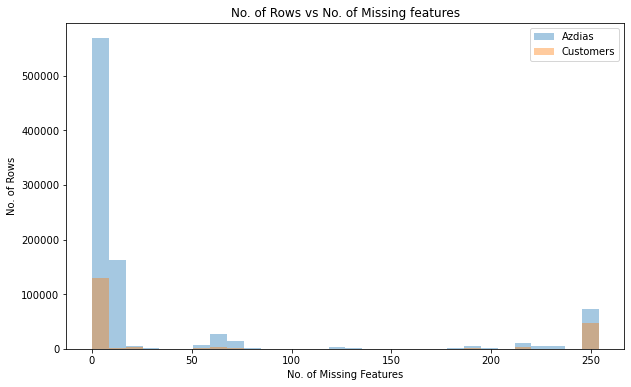

In [26]:
plot_missing_rowwise_histogram(azdias, customers)

As we can see, most rows (in both datasets) as less than 50 missings features. A non-negligable part miss a big quantity of values (~250 : 70% of features).  
Let's drop all rows with more than 50 features missing.

In [27]:
def remove_rows(df, threshold):
    """
    Drops rows with number of missing features as per given threshold.
    """
    
    df = df.dropna(thresh=df.shape[1]-threshold).reset_index(drop=True) # thresh (int, optional): Require that many non-NA values.
    
    return df

In [28]:
print("Number of rows Before dropping")
print("Azdias - {}".format(len(azdias)))
print("Customers - {}".format(len(customers)))

customers = remove_rows(customers, threshold=50)
azdias = remove_rows(azdias, threshold=50)

print("Number of rows After dropping")
print("Azdias - {}".format(len(azdias)))
print("Customers - {}".format(len(customers)))

Number of rows Before dropping
Azdias - 891221
Customers - 191652
Number of rows After dropping
Azdias - 737288
Customers - 134246


### Data transforming

We just succesfully deleted data scarce rows out of our datasets.   
Yet, some rows still have missing values (from 1 to 50 features) which we need to address. A possible solution, would be to impute most common values of corresponding features in these rows.   
In other words, we would assume that these missing values will be equal to the most common ones.
   
     
       
       
  
Before doing so, let's make sure that all our columns are in a correct format. 

In [29]:
azdias_object_cols = azdias.columns[azdias.dtypes == "object"]
customer_object_cols = customers.columns[customers.dtypes == "object"]
print("Azdias columns with dtype Object \n",azdias_object_cols.values)
print("Customers columns with dtype Object \n",customer_object_cols.values)

Azdias columns with dtype Object 
 ['CAMEO_DEU_2015' 'D19_LETZTER_KAUF_BRANCHE' 'EINGEFUEGT_AM' 'OST_WEST_KZ']
Customers columns with dtype Object 
 ['CAMEO_DEU_2015' 'D19_LETZTER_KAUF_BRANCHE' 'EINGEFUEGT_AM' 'OST_WEST_KZ']


Some columns seems to be filled with specific values, let's inspect each one of them and refer to attributes_values and attributes_infos for more insights.

In [30]:
for col in azdias_object_cols:
    print("\nColumn ",col)
    print(azdias[col].value_counts())


Column  CAMEO_DEU_2015
6B    54006
8A    50776
4C    43988
2D    32906
7A    32630
3C    32565
3D    32176
8B    31262
4A    30254
8C    30147
9D    26746
9B    25888
7B    22921
9C    22919
9A    20057
2C    17742
8D    16675
6E    15598
5D    14071
2B    14042
6C    13868
2A    11921
1D    11457
1A    10167
5A     9721
5B     9691
5C     9050
4B     8284
7C     8127
4D     8051
6A     6416
3A     5871
6D     5756
3B     5709
6F     5048
4E     5005
1E     4783
7D     4431
7E     4375
1C     4012
5F     3939
9E     3841
1B     3815
5E     3241
XX      284
Name: CAMEO_DEU_2015, dtype: int64

Column  D19_LETZTER_KAUF_BRANCHE
D19_UNBEKANNT             179081
D19_VERSICHERUNGEN         52220
D19_SONSTIGE               40546
D19_VOLLSORTIMENT          31292
D19_SCHUHE                 28486
D19_BUCH_CD                25643
D19_VERSAND_REST           23398
D19_DROGERIEARTIKEL        21371
D19_BANKEN_DIREKT          20993
D19_BEKLEIDUNG_REST        19147
D19_HAUS_DEKO              18823
D19_

Both CAMEO_DEU_2015 and D19_LETZTER_KAUF_BRANCHE have many different categorical values.  
To one-encode them all (for modeling purposes) would increase way too much the number of parameters/features.  
For the sake of simplicity, we will just get rid of those columns.

In [31]:
del customers["CAMEO_DEU_2015"]
del customers["D19_LETZTER_KAUF_BRANCHE"]

del azdias["CAMEO_DEU_2015"]
del azdias["D19_LETZTER_KAUF_BRANCHE"]

Column EINGEFUEGT_AM contains the date of an event.   
Our goal here, would be to transform this data into a numerical value (so that it can be fed to a model).  
As simple way to do it would be to retain only the year:


In [32]:
def date_to_year(df):
    
    df["EINGEFUEGT_AM"] = pd.to_datetime(df["EINGEFUEGT_AM"])
    df["EINGEFUEGT_AM"] = df['EINGEFUEGT_AM'].map(lambda x: x.year)
    
    return df

In [34]:
customers = date_to_year(customers)
azdias = date_to_year(azdias)

Finally, column OST_WEST_KZ tells us in which part of Germany the person was before the unification, West or OST (East).   
We can simply binary encode it.

In [36]:
def encode_ost_west_col(df):
    """
    Encodes the feature "OST_WEST_KZ"
    """
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace({"W": 0, "O": 1})
    
    return df

In [37]:
customers = encode_ost_west_col(customers)
azdias = encode_ost_west_col(azdias)

# DELETE THIS PART

In [38]:
def fix_anrede_col(df):
    """
    Encodes the feature "ANREDE_KZ"
    """
    df["ANREDE_KZ"] = df["ANREDE_KZ"].replace({1: 0, 2: 1})
    
    return df

In [40]:
customers = fix_anrede_col(customers)
azdias = fix_anrede_col(azdias)

### Replacing NaN values
We previously dropped columns and rows with missing values based on defined threshold. Yet, we still have some columns having missing values.
We can now address these missing values by either filling them with the mean of the values or most common values.

The Skicit-learn library offers a nice tool to do so (imported within the first cell of this notebook).

In [46]:
imputer = SimpleImputer(strategy="most_frequent") # With this parameter, we will replace the NaN values by the most frequent value for this parameter.
imputer.fit(azdias) # We will fit the imputer on the azidias esclusively, as it contains the most data. 

azdias = pd.DataFrame(imputer.transform(azdias), columns = azdias.columns)
customers = pd.DataFrame(imputer.transform(customers), columns = customers.columns)

### Standardization
we can now scale the data to make sure all the features have the same range. We are going to use StandardScaler from sklearn to scale the data.

LEARN ABOUT STANDARD SCALER


MAKE A FINAL FUNCTION IN "UTILS.PY"
SAVE THE DATA IN A NEW FOLDER

In [ ]:
When it is time to normalize:

In [ ]:
azdias.describe()

In [ ]:
customers.describe()